# Import Necessary Liabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("data/energy_production.csv", sep=';')
df

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [3]:
df.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

In [4]:
df.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

# Looking at the above-described statistics, we can quickly determine which columns contain missing data. At the same time, we can determine whether the outlier are present or not by comparing them to the 75% and maximum values. We can also determine the skewness.

In [5]:
df.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Duplicates

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9563    False
9564    False
9565    False
9566    False
9567    False
Length: 9568, dtype: bool

In [8]:
df.duplicated().sum()

41

# Print out the duplicated

In [9]:
df[df.duplicated]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [10]:
df[df.duplicated(keep = False)]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
11          26.12           75.60       1017.41       72.31             439.68
45          28.41           75.60       1018.48       56.07             440.28
214         11.82           41.17       1019.50       55.74             475.61
708         11.61           41.17       1019.57       58.82             476.81
946         24.79           75.60       1017.07       68.23             440.05
...           ...             ...           ...         ...                ...
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

[82 rows x 5 columns]

# Drop Duplicated records

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(9527, 5)

# Missing value imputation
- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
- Incomplete data entry
- Issues with machines
- Improper handling of data
- And many more.

In [14]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

# Outlier detection

 - There are multiple approaches to detect outliers in the dataset.
      - Histogram
      - Boxplot
      - Descriptive stats for df

In [15]:
df.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9527.000000     9527.000000   9527.000000  9527.000000   
mean     19.658225       54.293421   1013.237084    73.334951   
std       7.444397       12.686309      5.940526    14.607513   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.530000       41.740000   1009.085000    63.375000   
50%      20.350000       52.080000   1012.920000    75.000000   
75%      25.710000       66.510000   1017.200000    84.850000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count         9527.00000  
mean           454.33591  
std             17.03908  
min            420.26000  
25%            439.75000  
50%            451.52000  
75%            468.36500  
max            495.76000

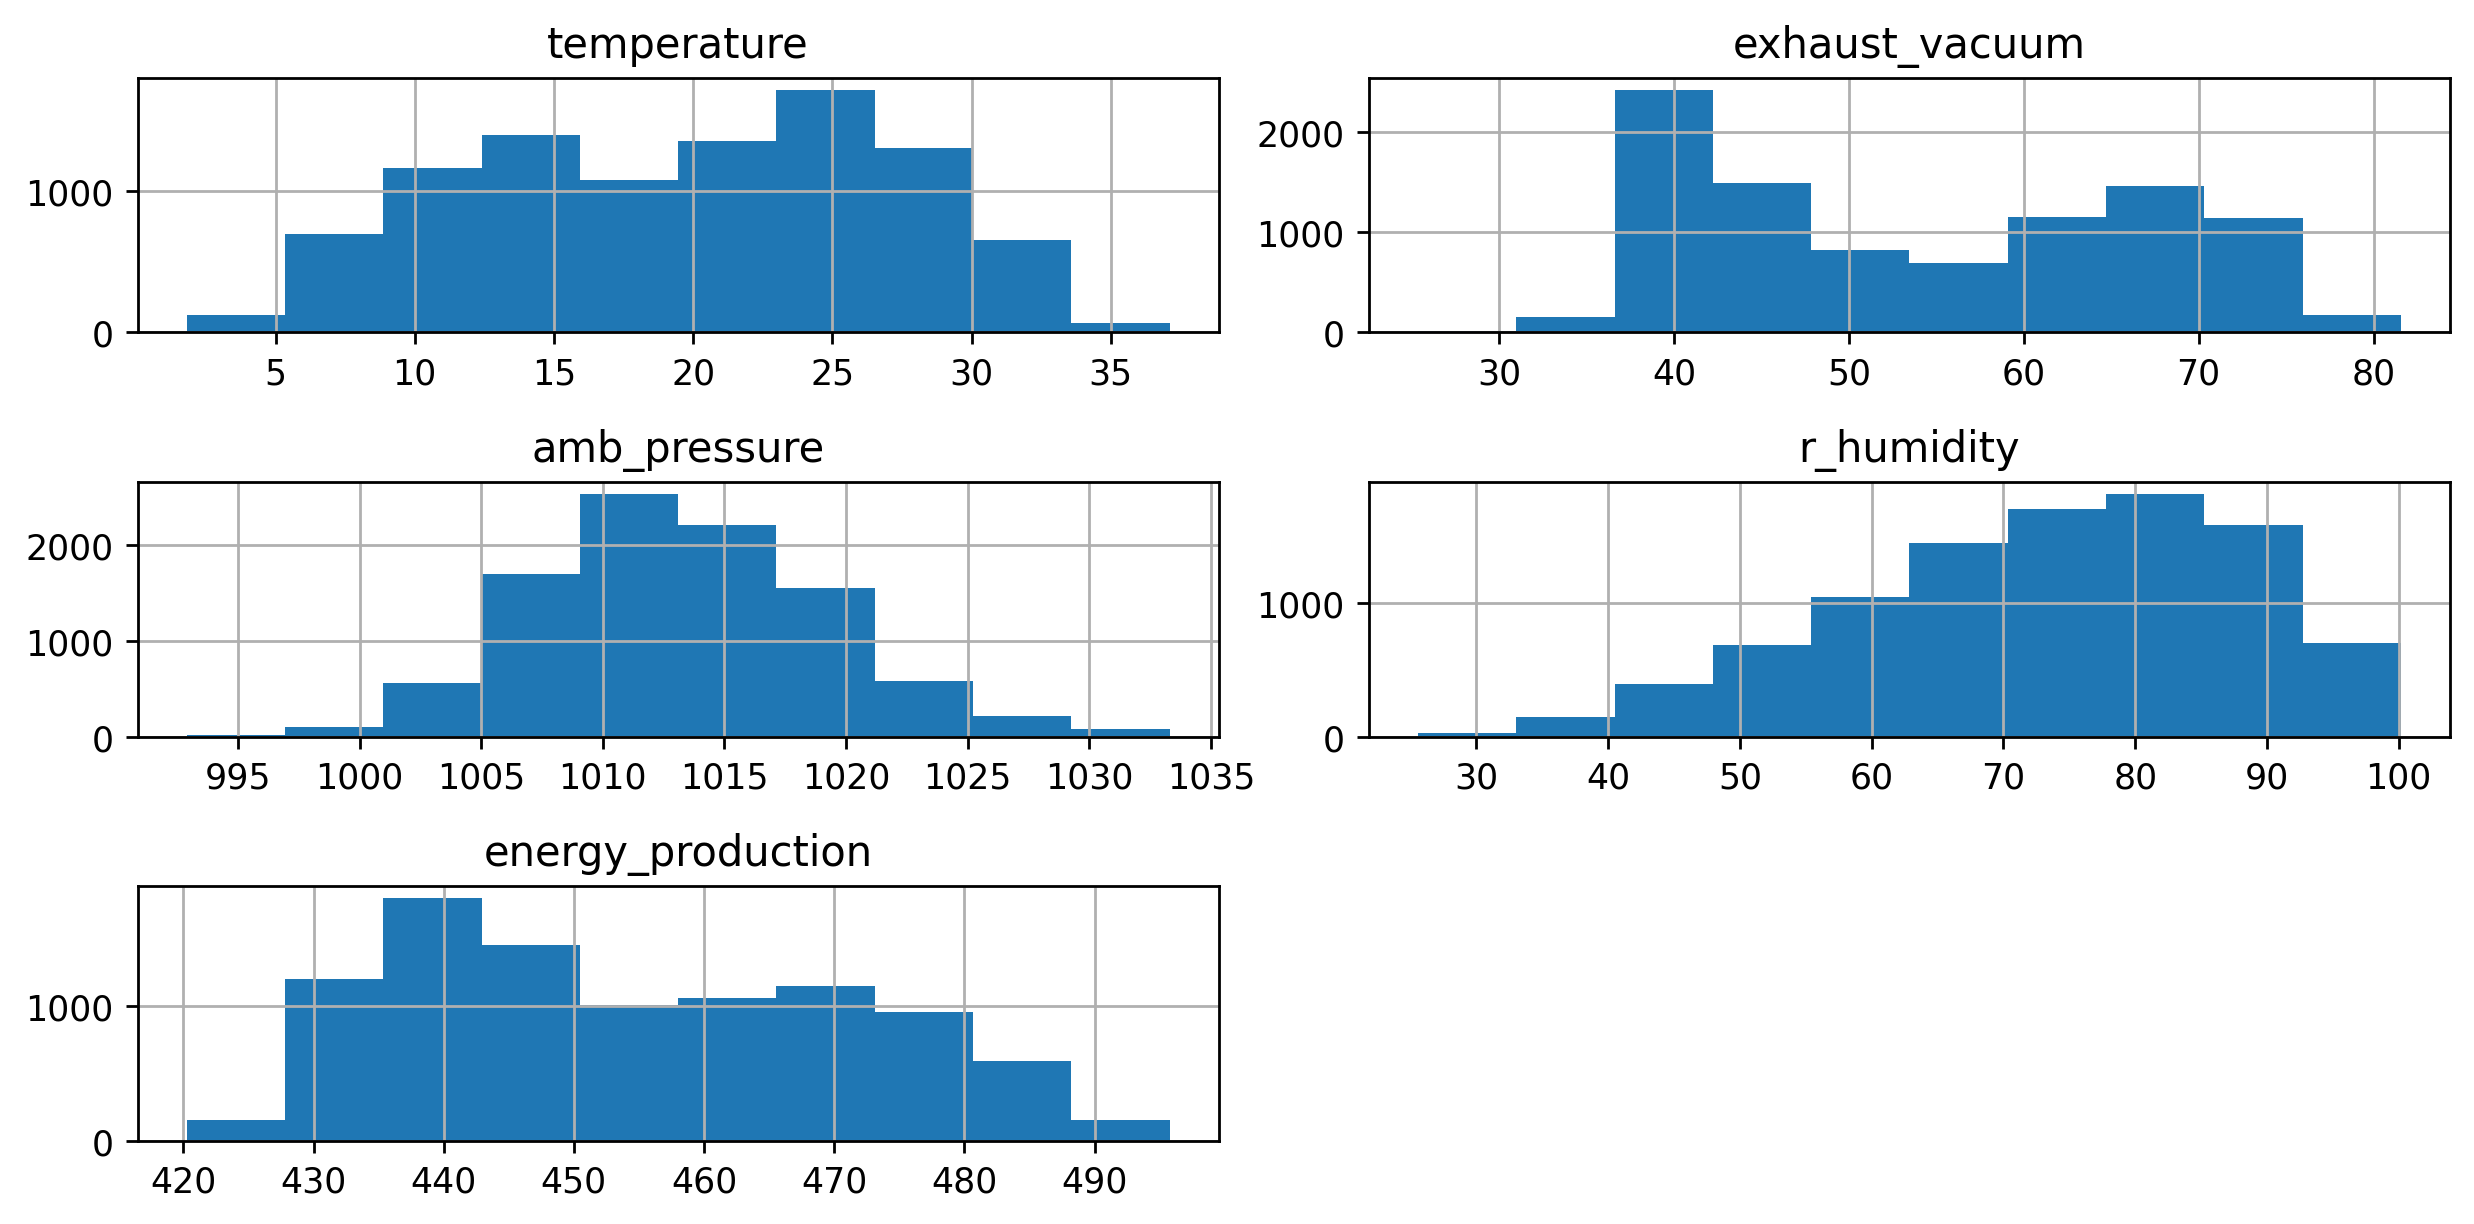

In [16]:
df.hist()
plt.tight_layout()

<Axes: >

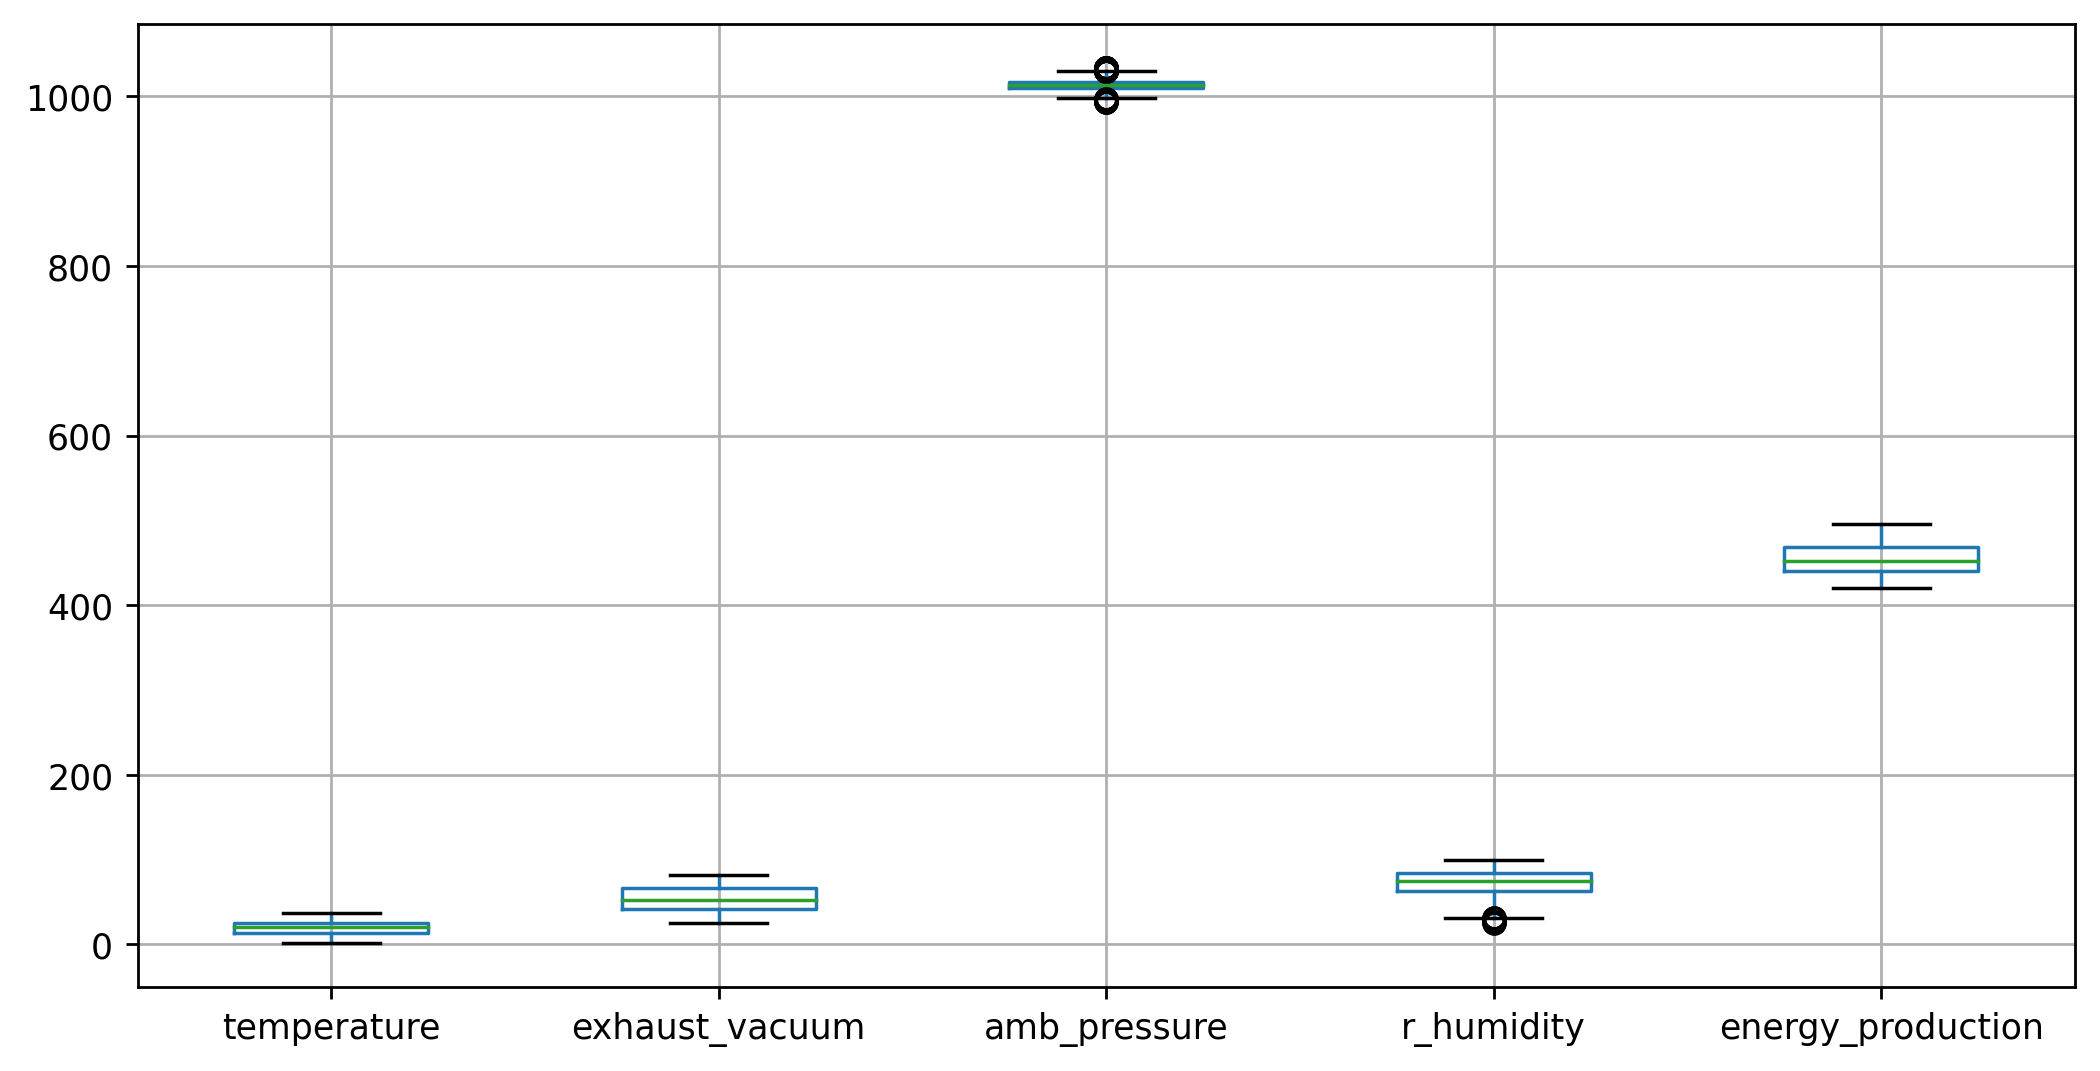

In [17]:
df.boxplot()

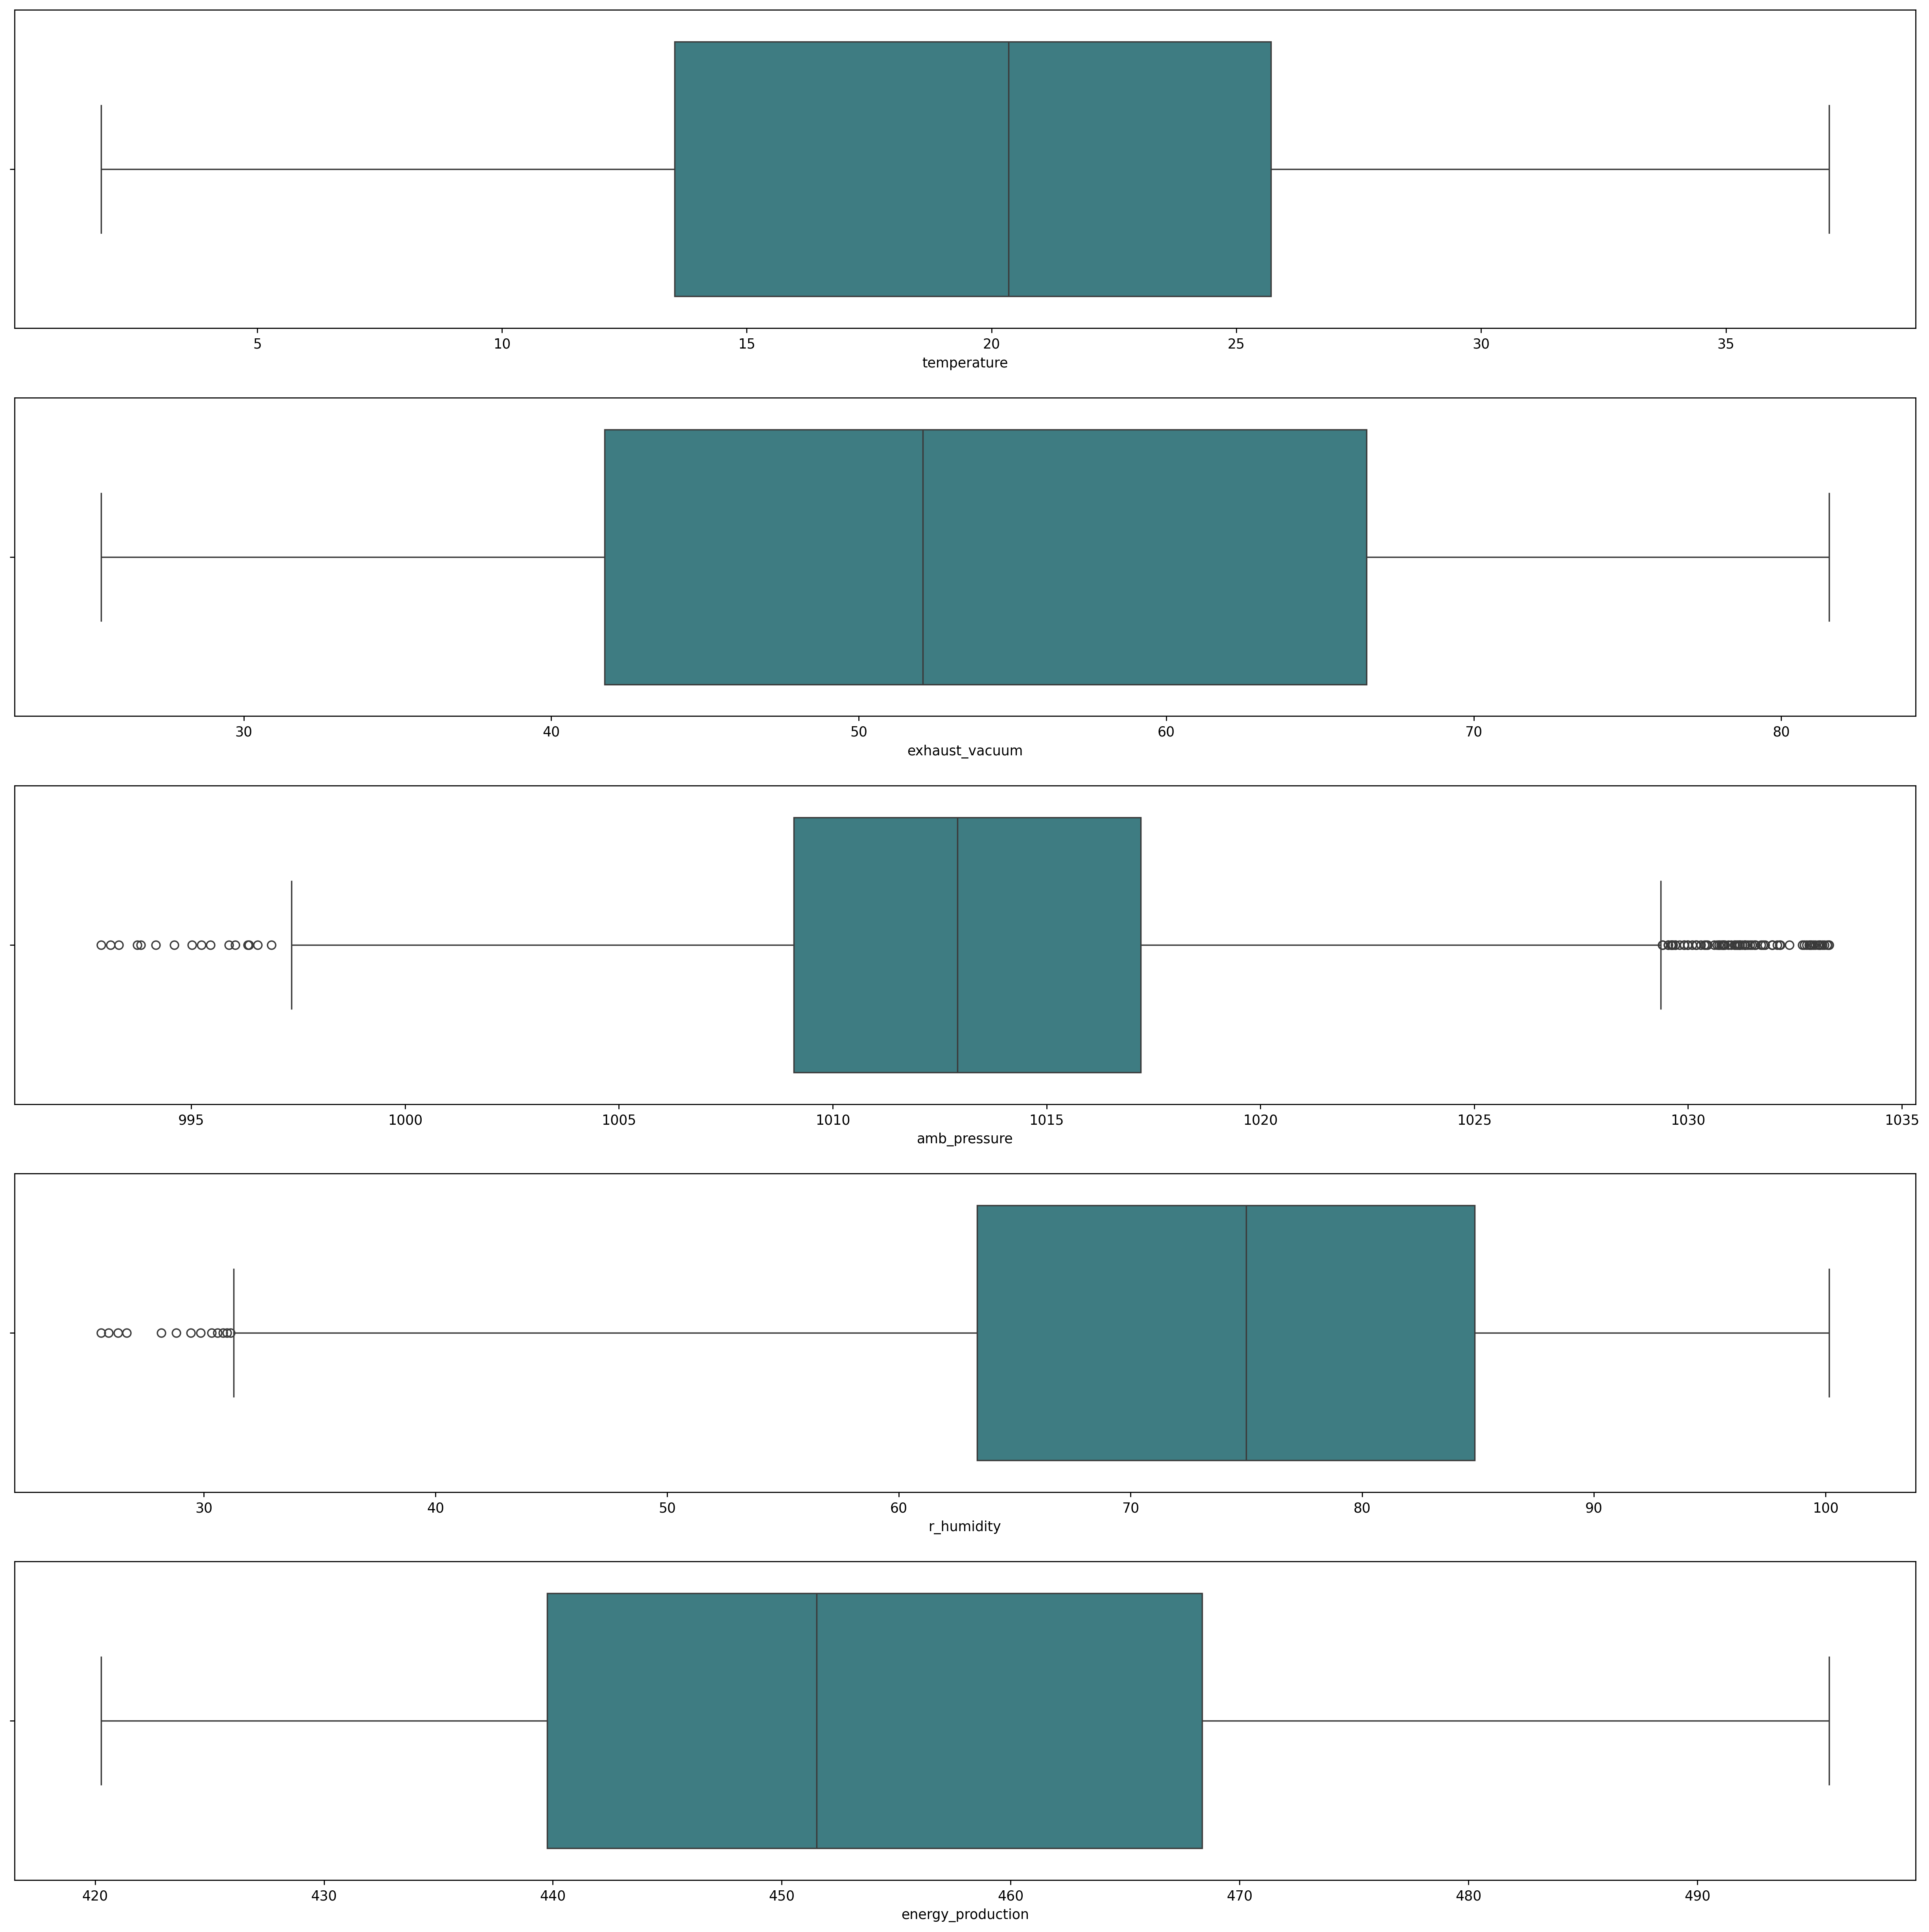

In [18]:
ot=df.copy() 
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='amb_pressure',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='r_humidity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='energy_production',data=ot,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

# Only two columns shown an outlier, thus we must deal with it before establishing the mode.

# Outlier detection function

In [19]:
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower, upper

In [20]:
outlier_detection(df, "amb_pressure")

(996.9125, 1029.3725)

Text(0.5, 1.0, 'Before the outlier replaced with upper and lower extreme values')

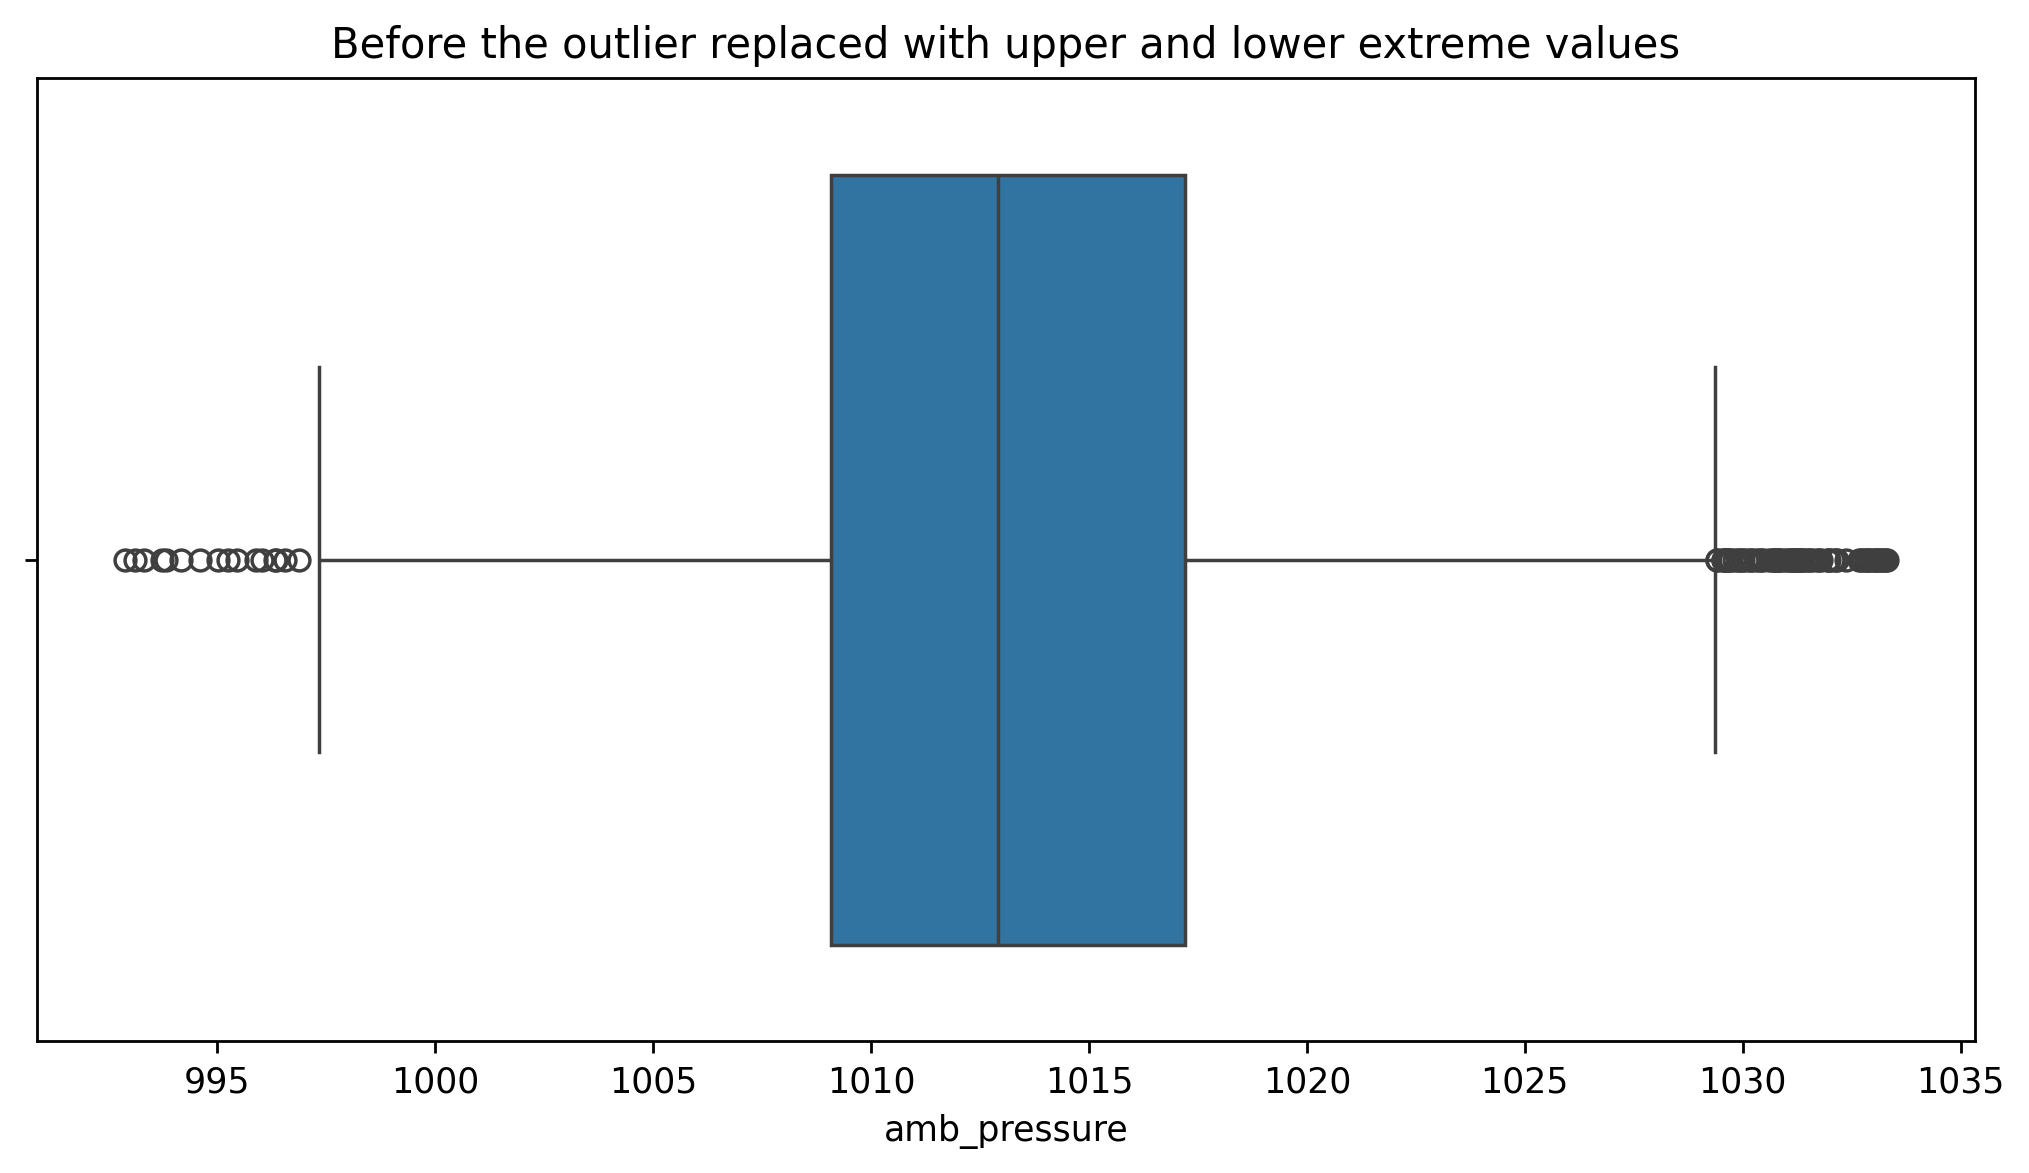

In [21]:
sns.boxplot(x =df["amb_pressure"])
plt.xlabel ("amb_pressure")
plt.title ("Before the outlier replaced with upper and lower extreme values")

In [22]:
df.loc[df["amb_pressure"]>1029.3725, "amb_pressure"] = 1029.3725

In [23]:
df.loc[df["amb_pressure"]<996.9125, "amb_pressure"] = 996.9125

Text(0.5, 1.0, 'After replaced the outlier with upper and lower extreme values')

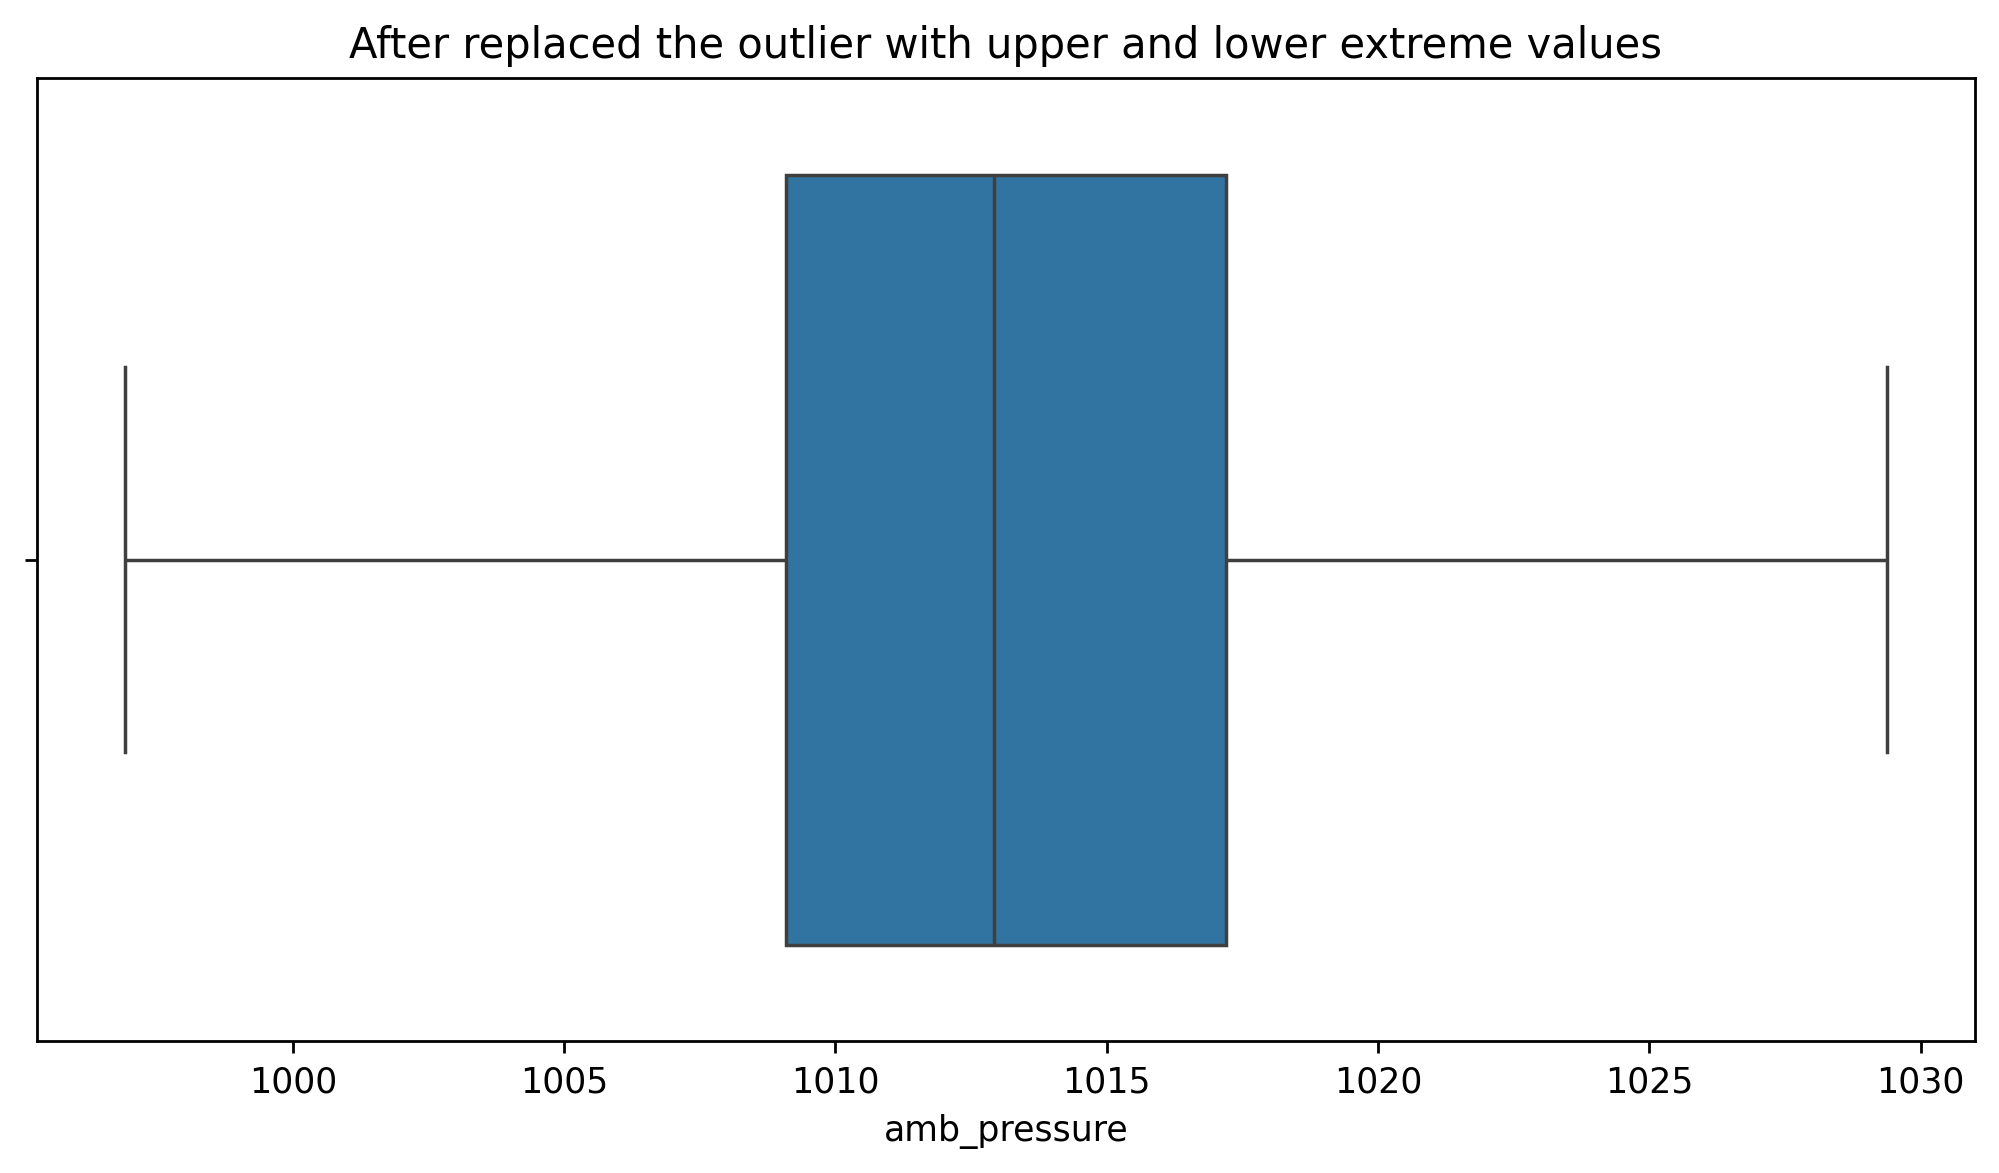

In [24]:
sns.boxplot(x= df["amb_pressure"])
plt.xlabel("amb_pressure")
plt.title("After replaced the outlier with upper and lower extreme values")

In [25]:
outlier_detection(df, "r_humidity")

(31.16250000000001, 117.06249999999999)

Text(0.5, 1.0, 'Before the outliers replace with upper and lower extreme values')

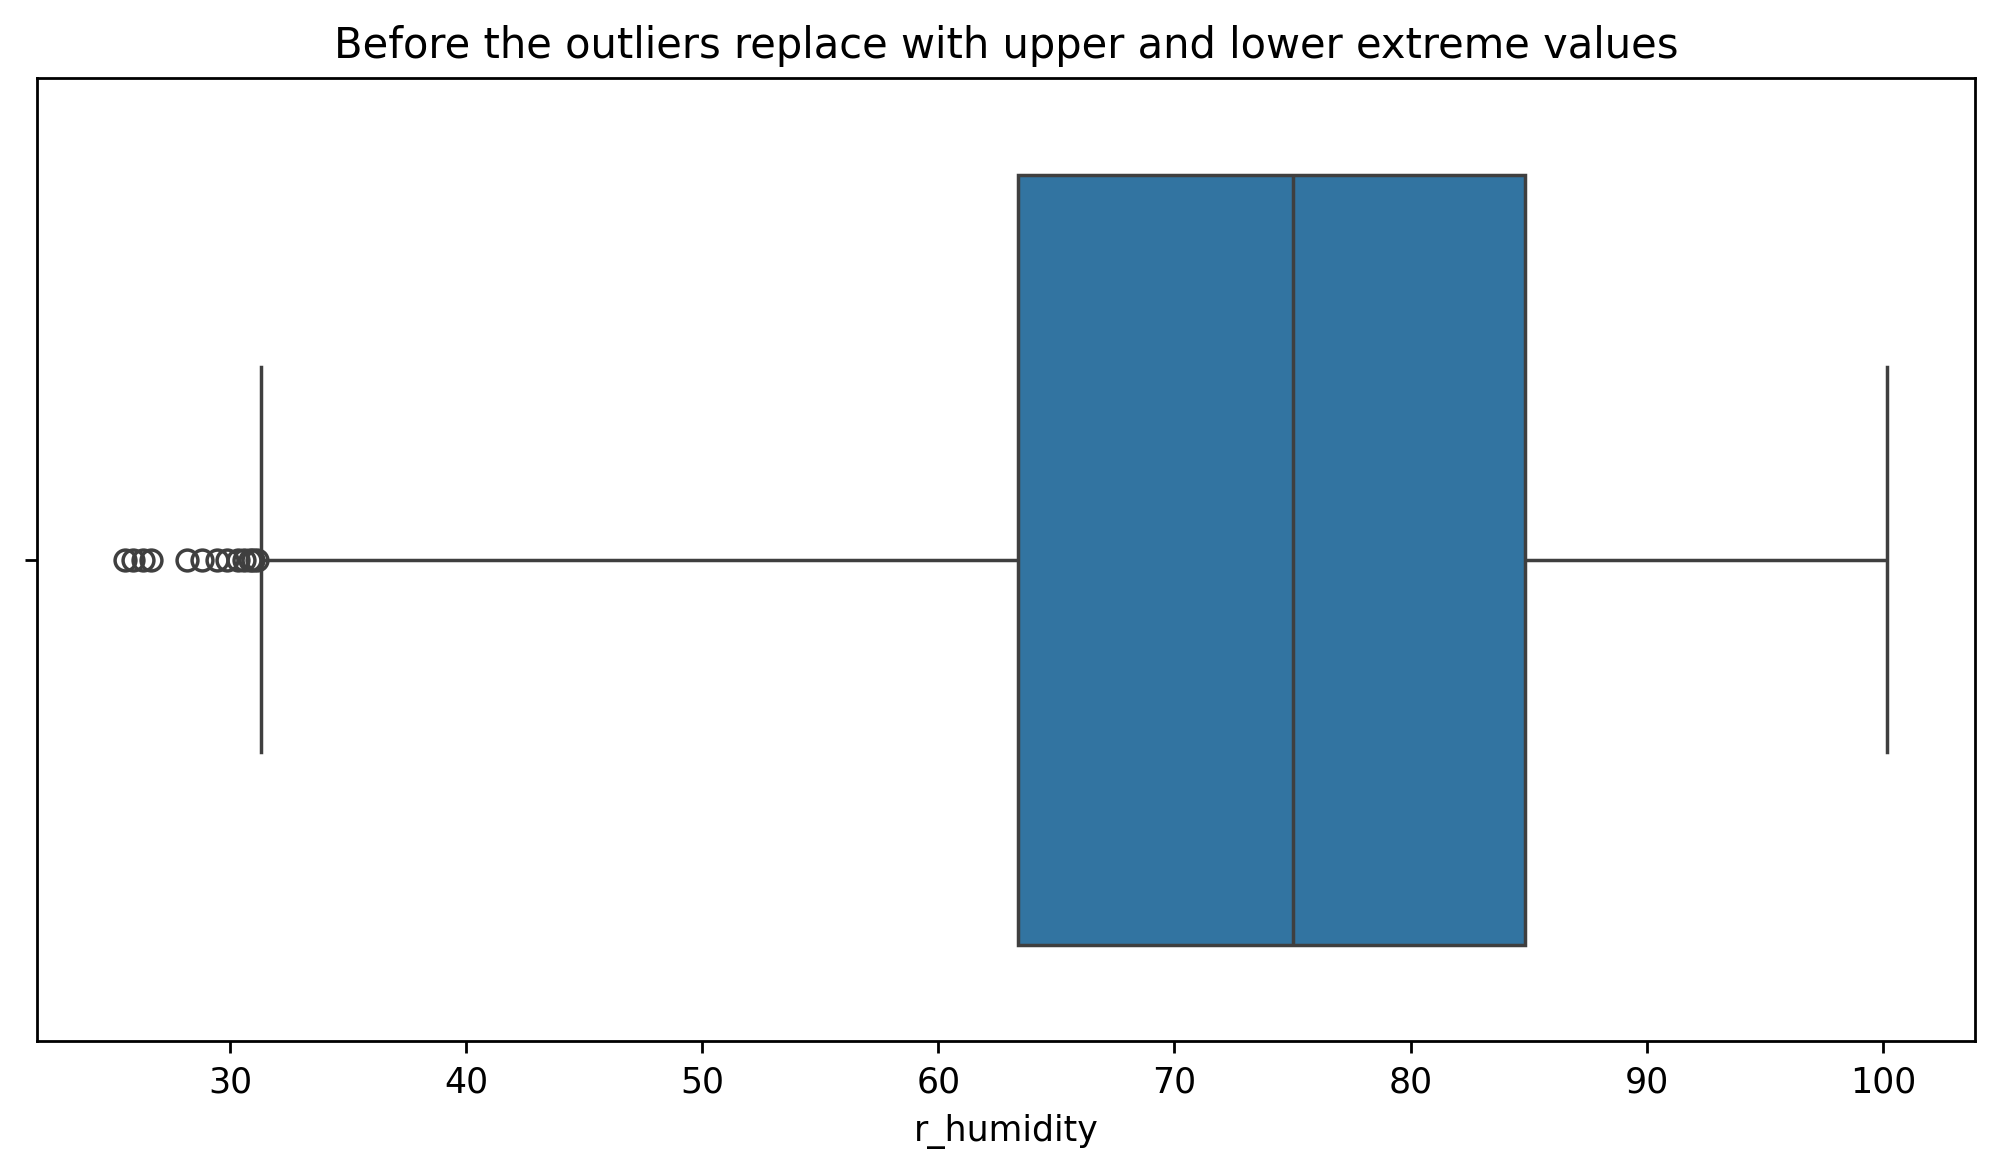

In [26]:
sns.boxplot(x=df["r_humidity"])
plt.xlabel("r_humidity")
plt.title("Before the outliers replace with upper and lower extreme values")

In [27]:
df.loc[df["r_humidity"]<31.16250000000001, "r_humidity"] = 31.16250000000001

Text(0.5, 1.0, 'After replaced the outlier with lower extreme values')

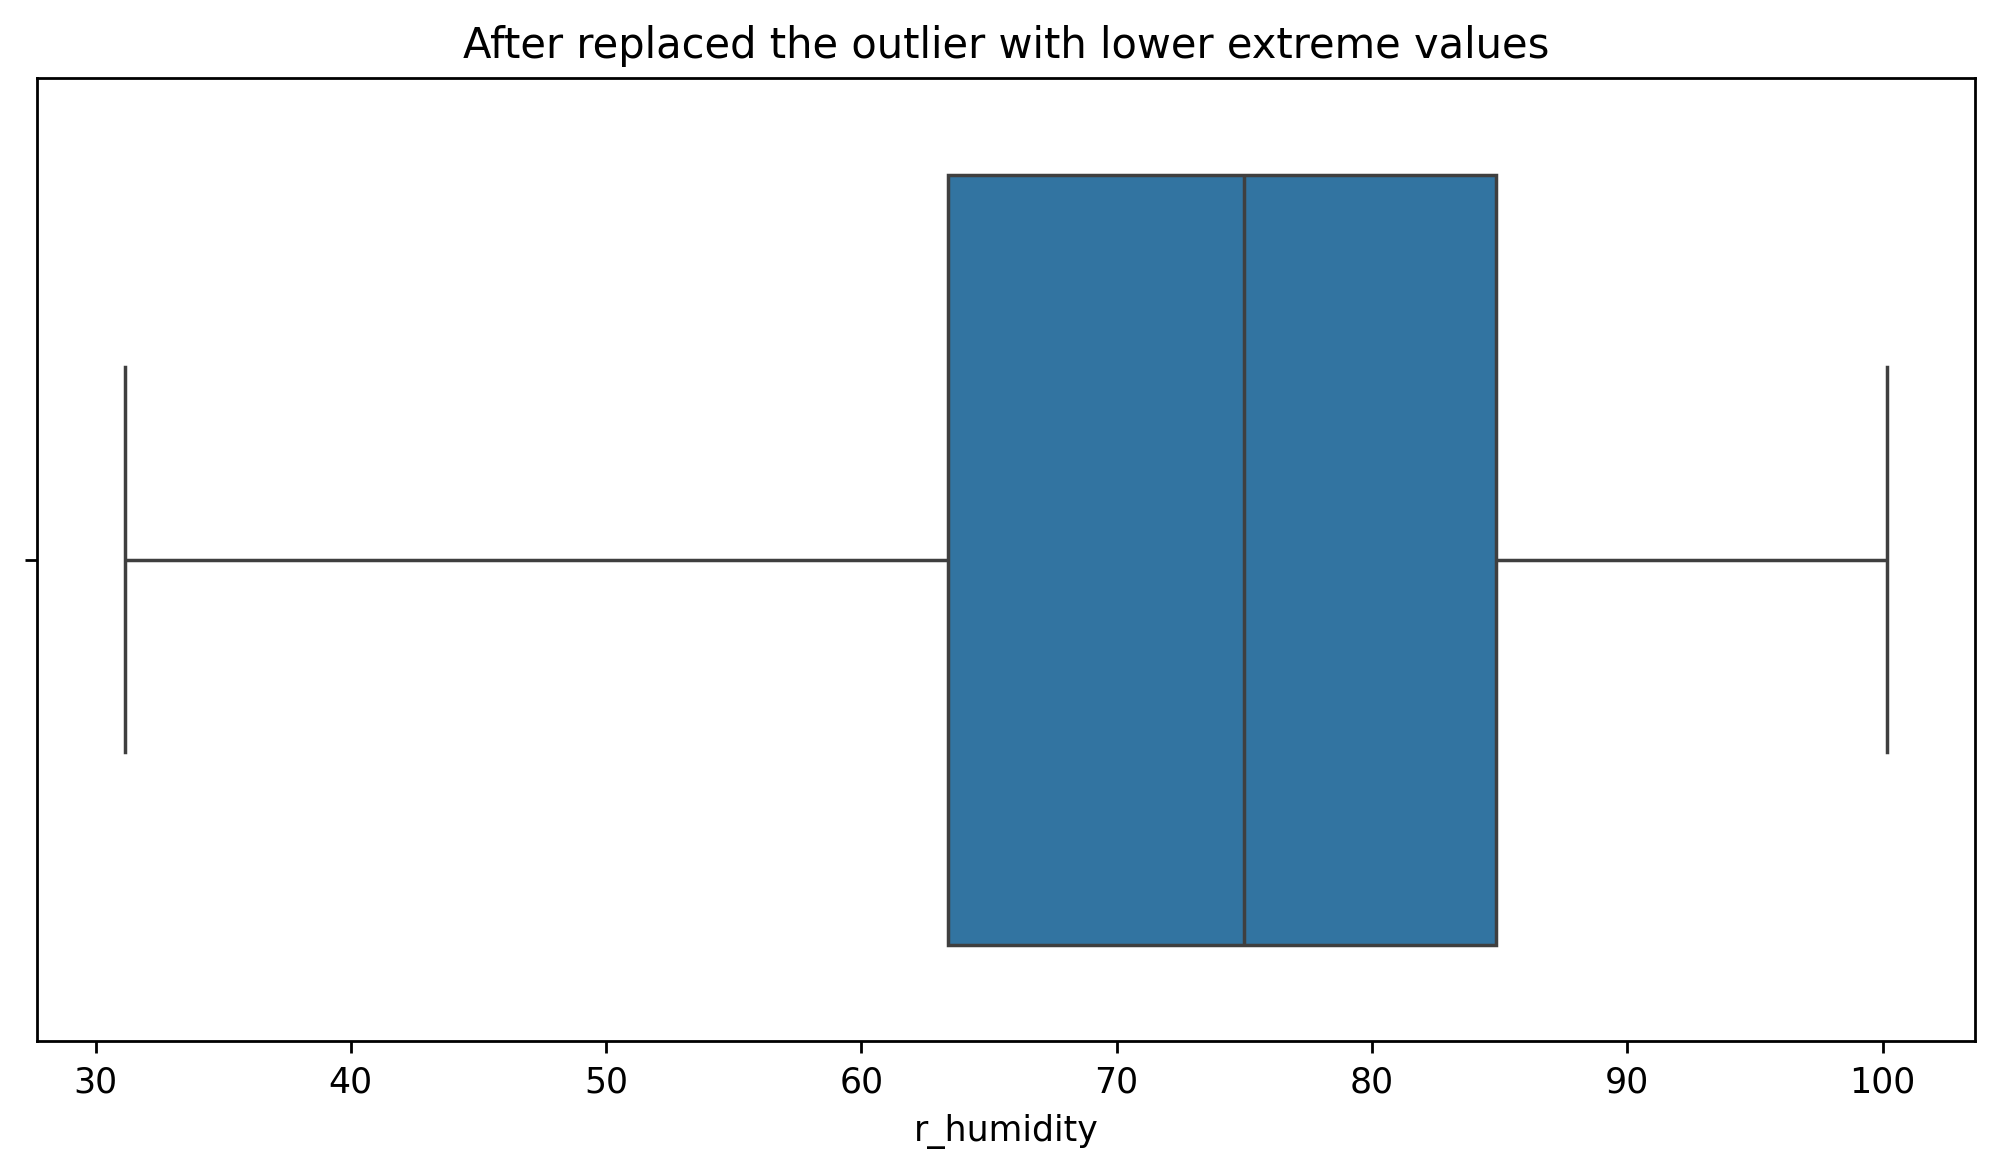

In [28]:
sns.boxplot(x=df["r_humidity"])
plt.xlabel("r_humidity")
plt.title("After replaced the outlier with lower extreme values")

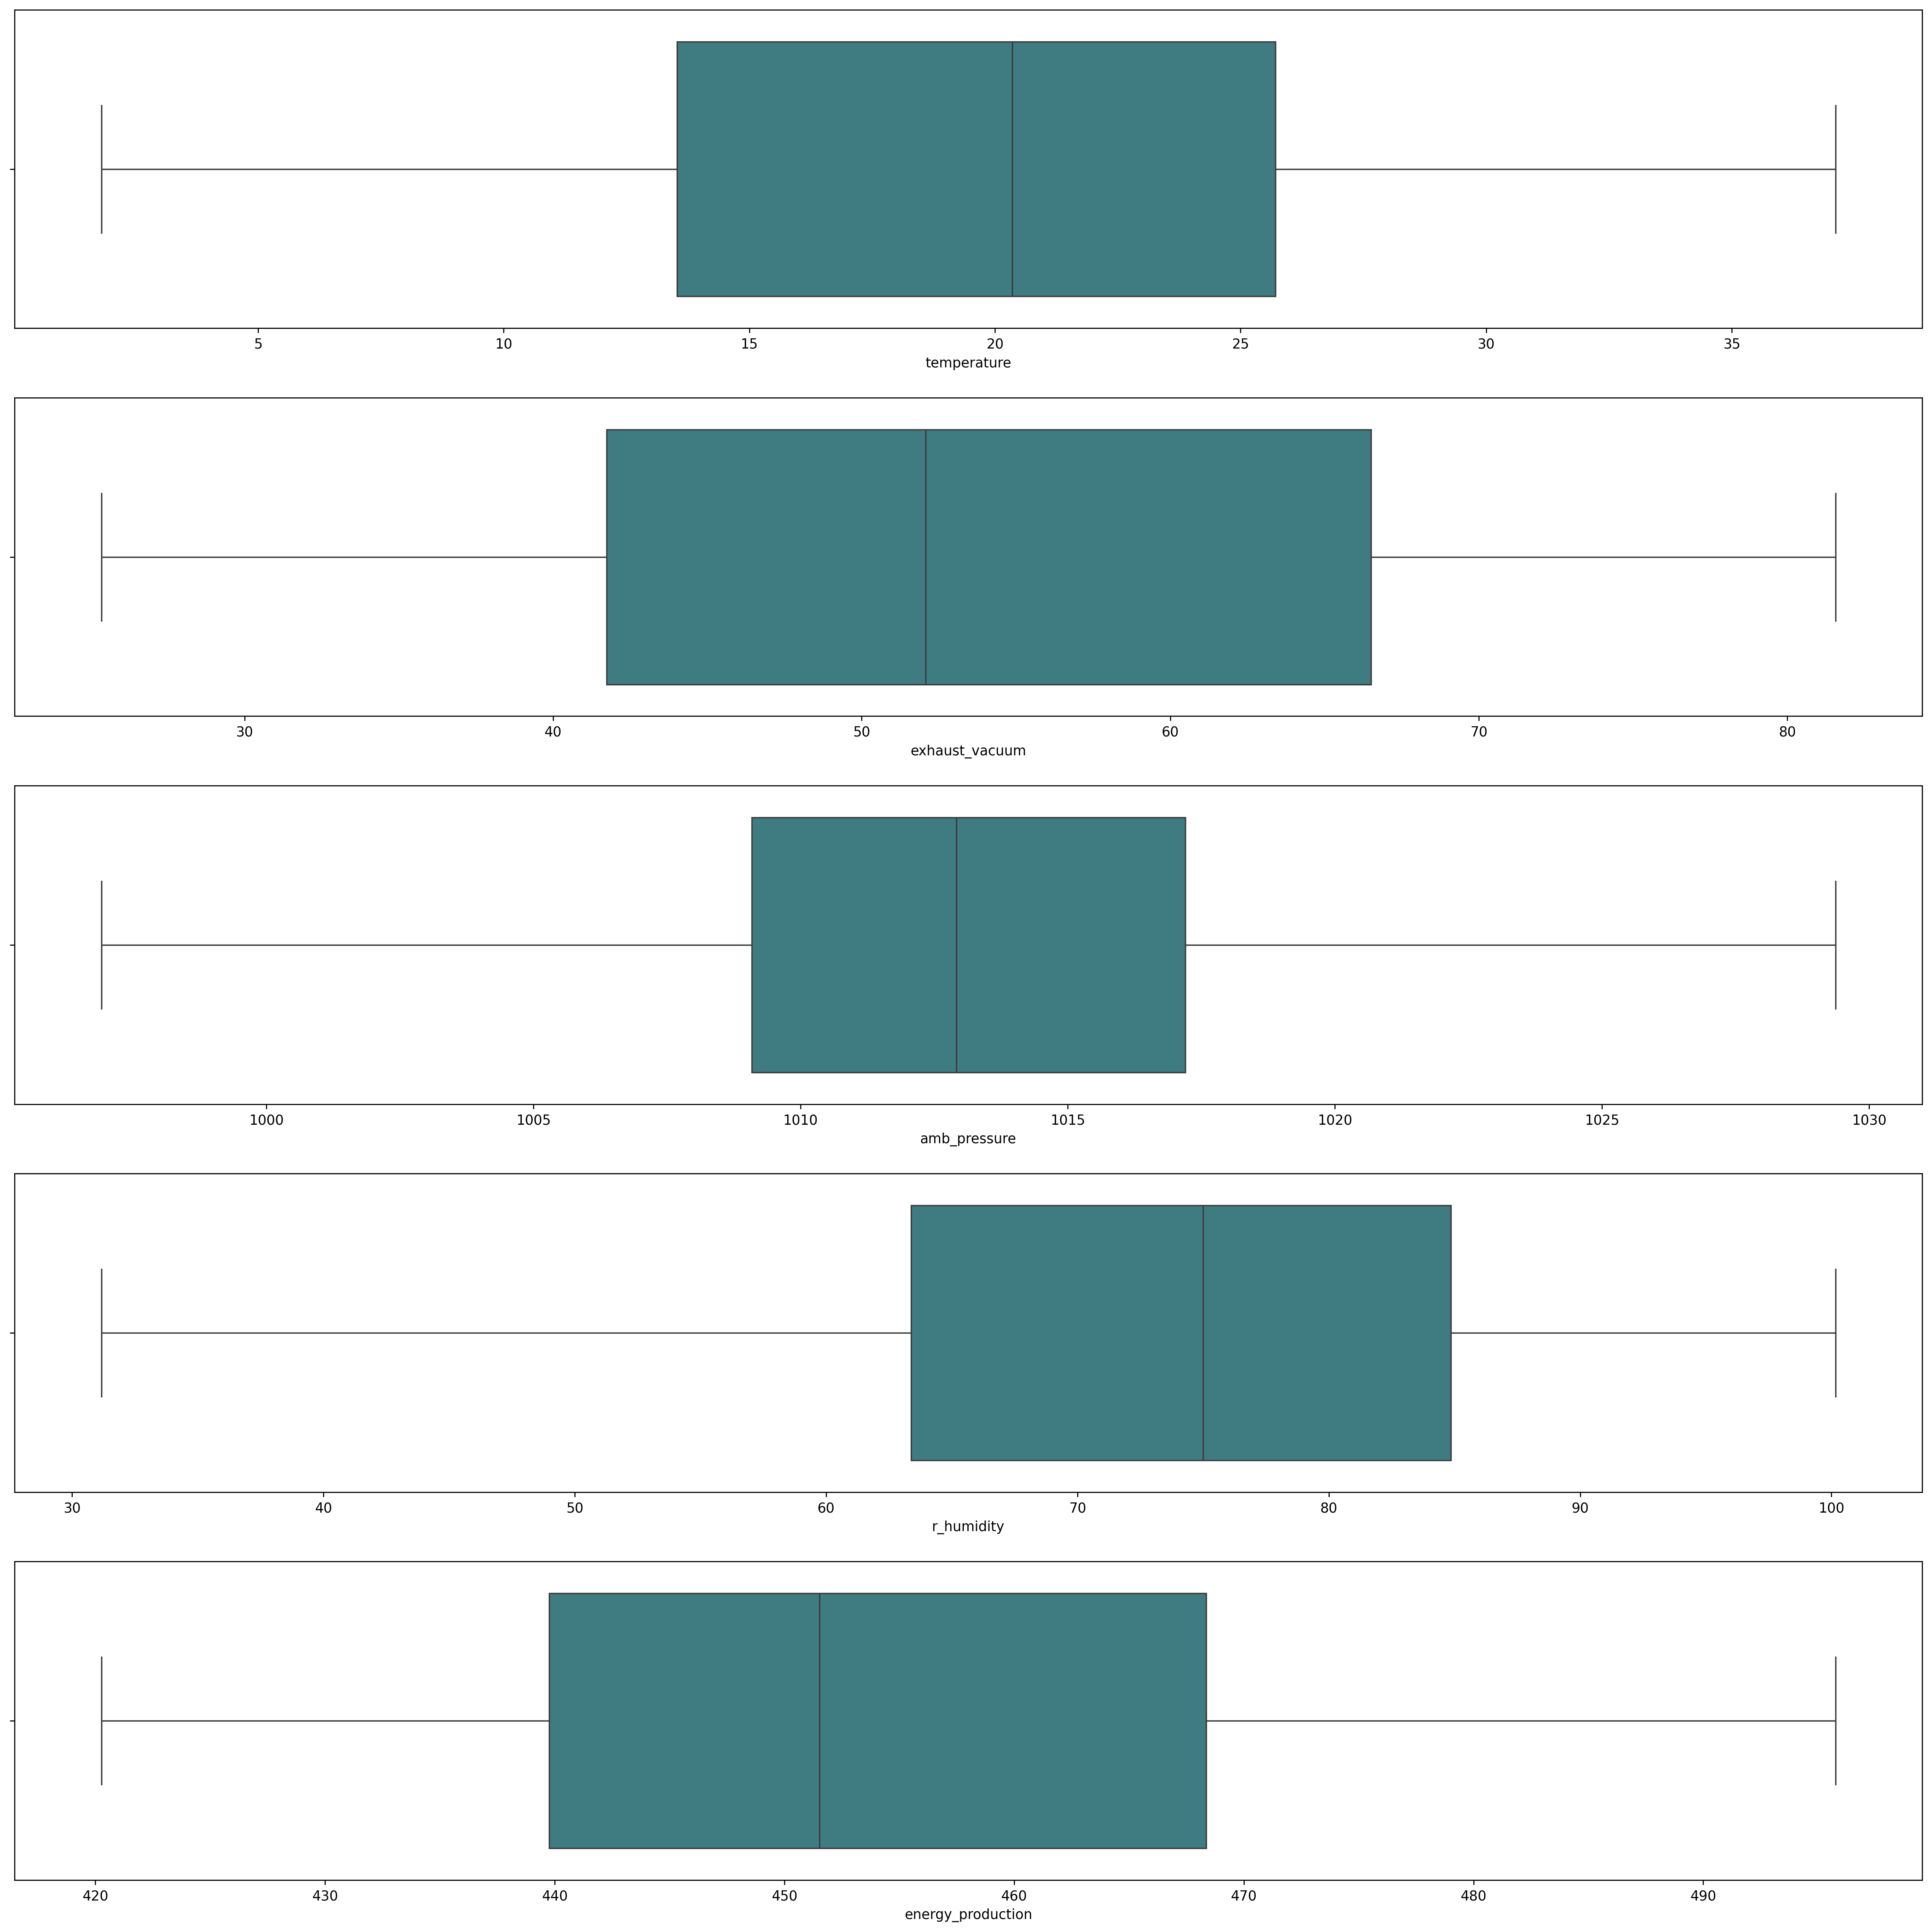

In [29]:
ot=df.copy() 
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='amb_pressure',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='r_humidity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='energy_production',data=ot,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

# Scatter Plot and Correlation

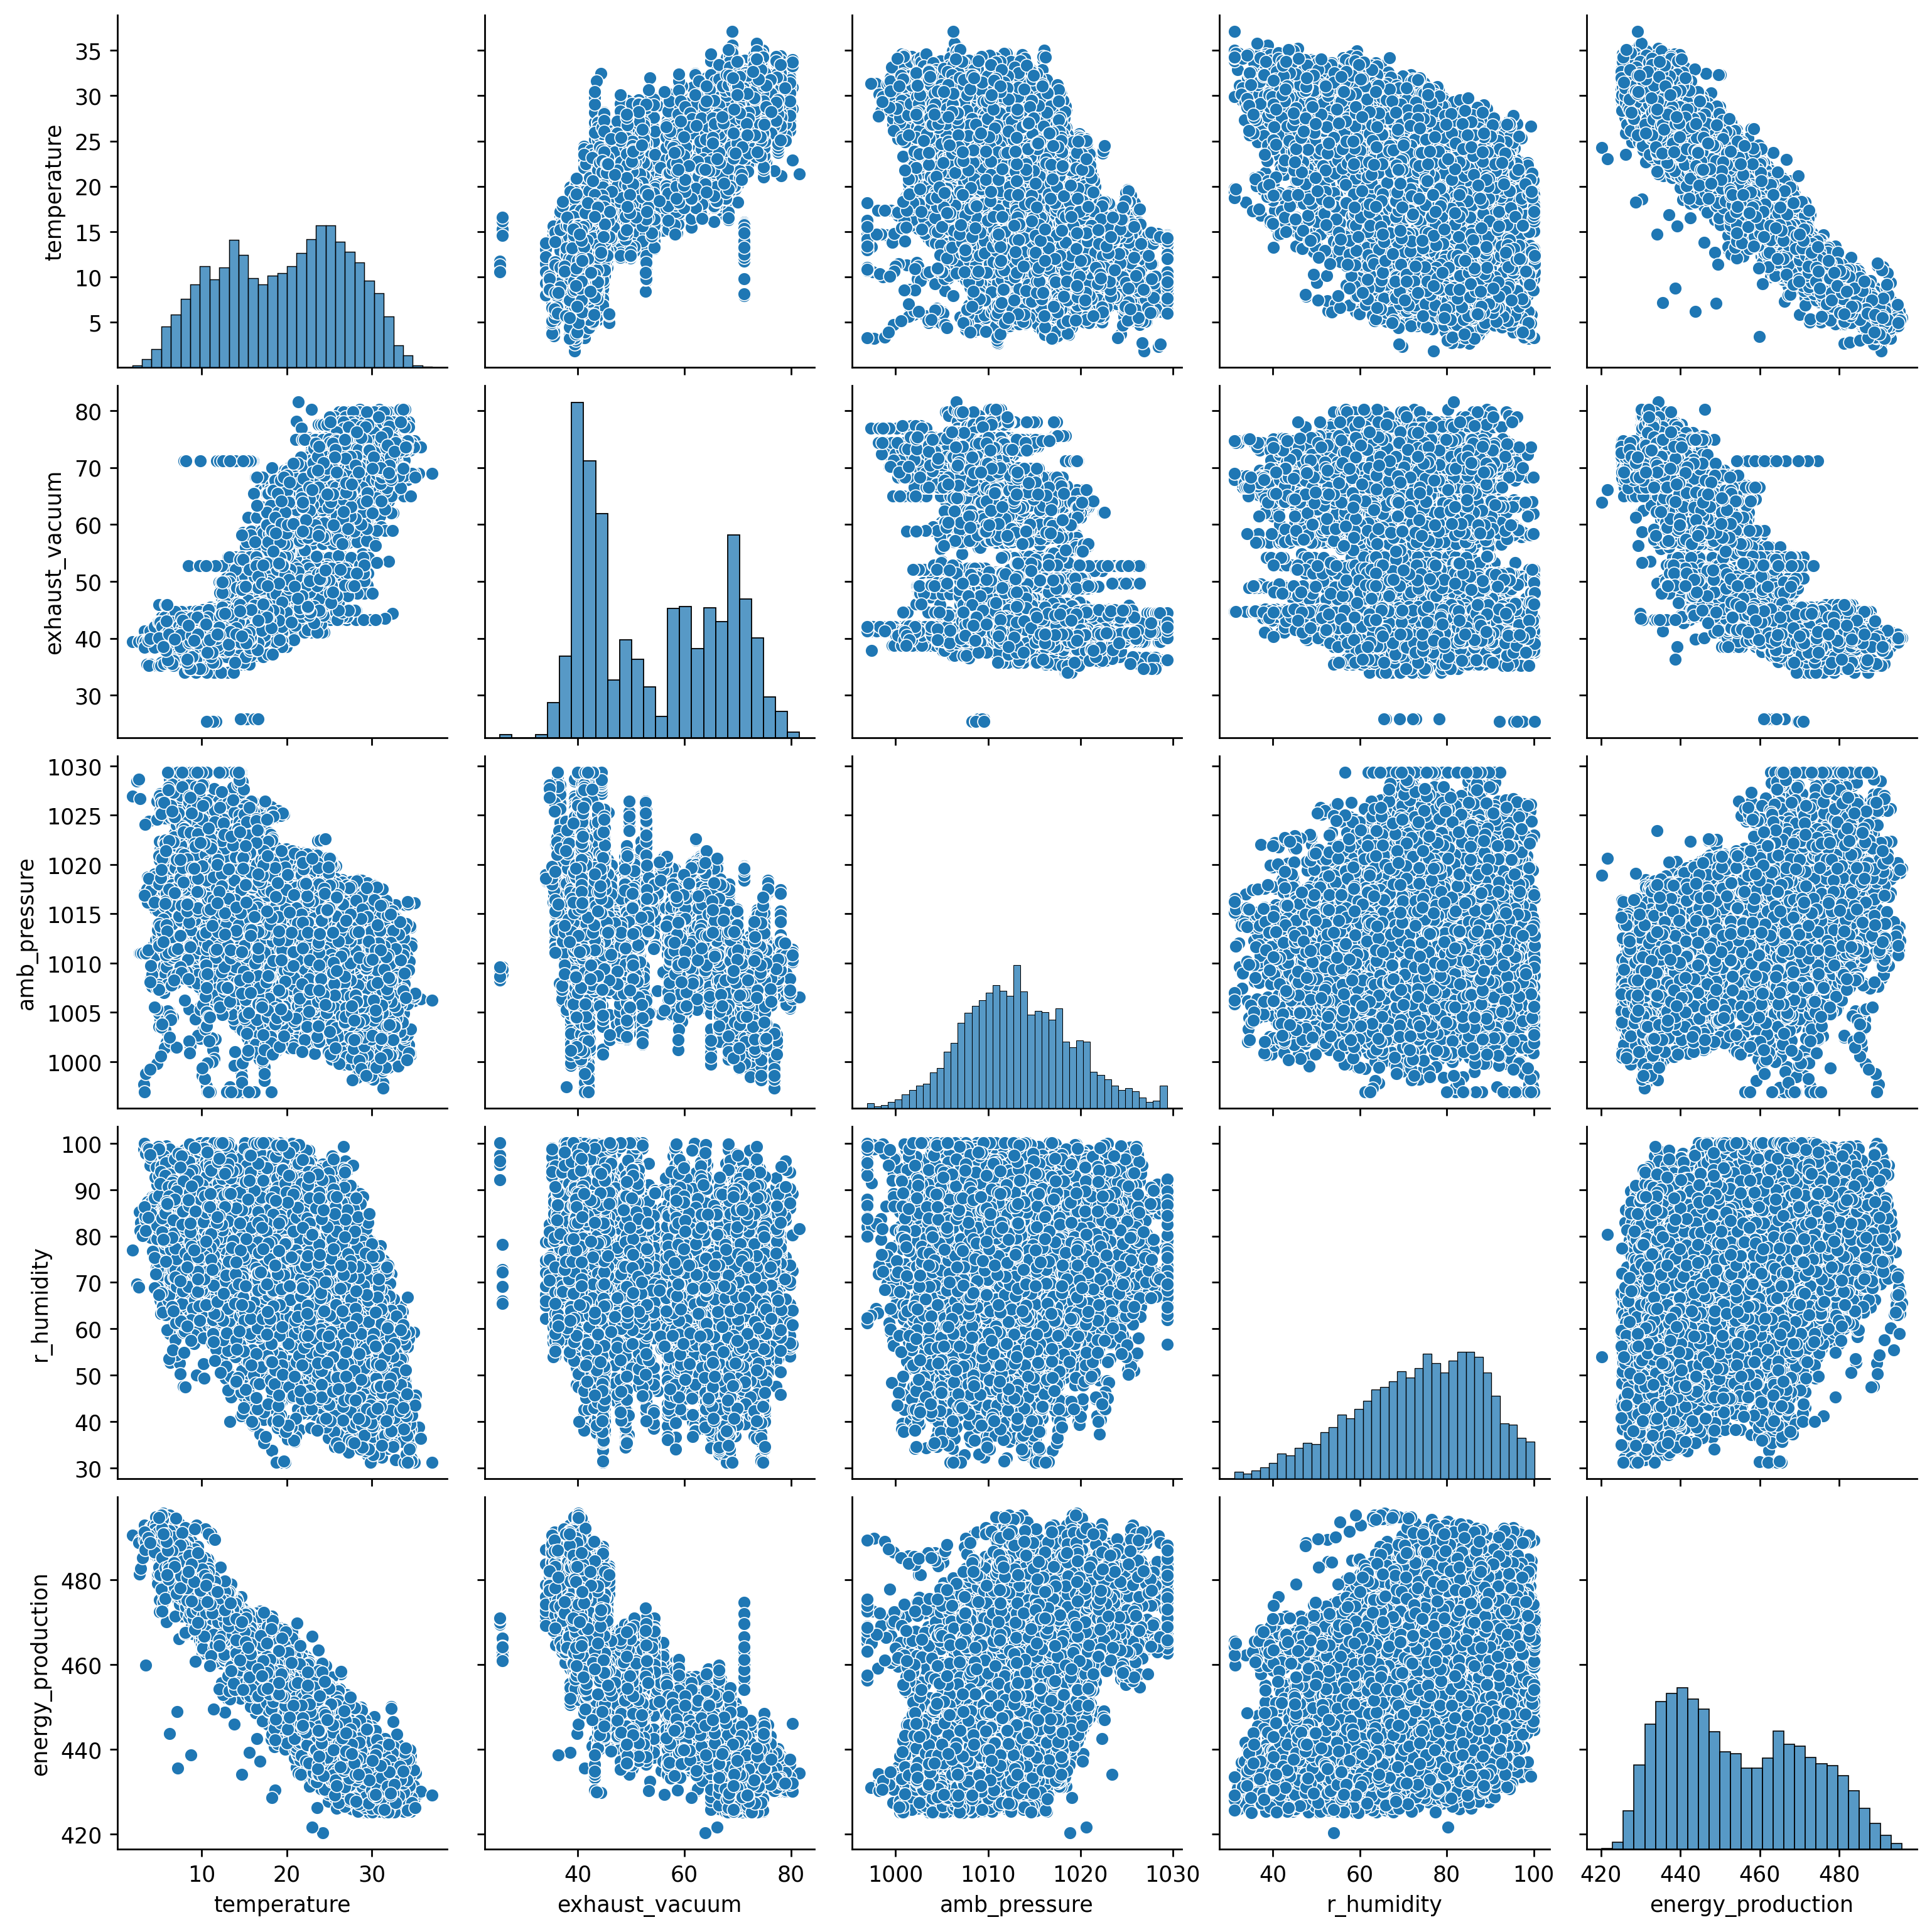

In [30]:
sns.pairplot(df)

# Correlation coefficient

In [31]:
df.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.509968   -0.543946   
exhaust_vacuum        0.843689        1.000000     -0.417553   -0.312162   
amb_pressure         -0.509968       -0.417553      1.000000    0.102964   
r_humidity           -0.543946       -0.312162      0.102964    1.000000   
energy_production    -0.947908       -0.869900      0.520663    0.391166   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.520663  
r_humidity                  0.391166  
energy_production           1.000000

<Axes: >

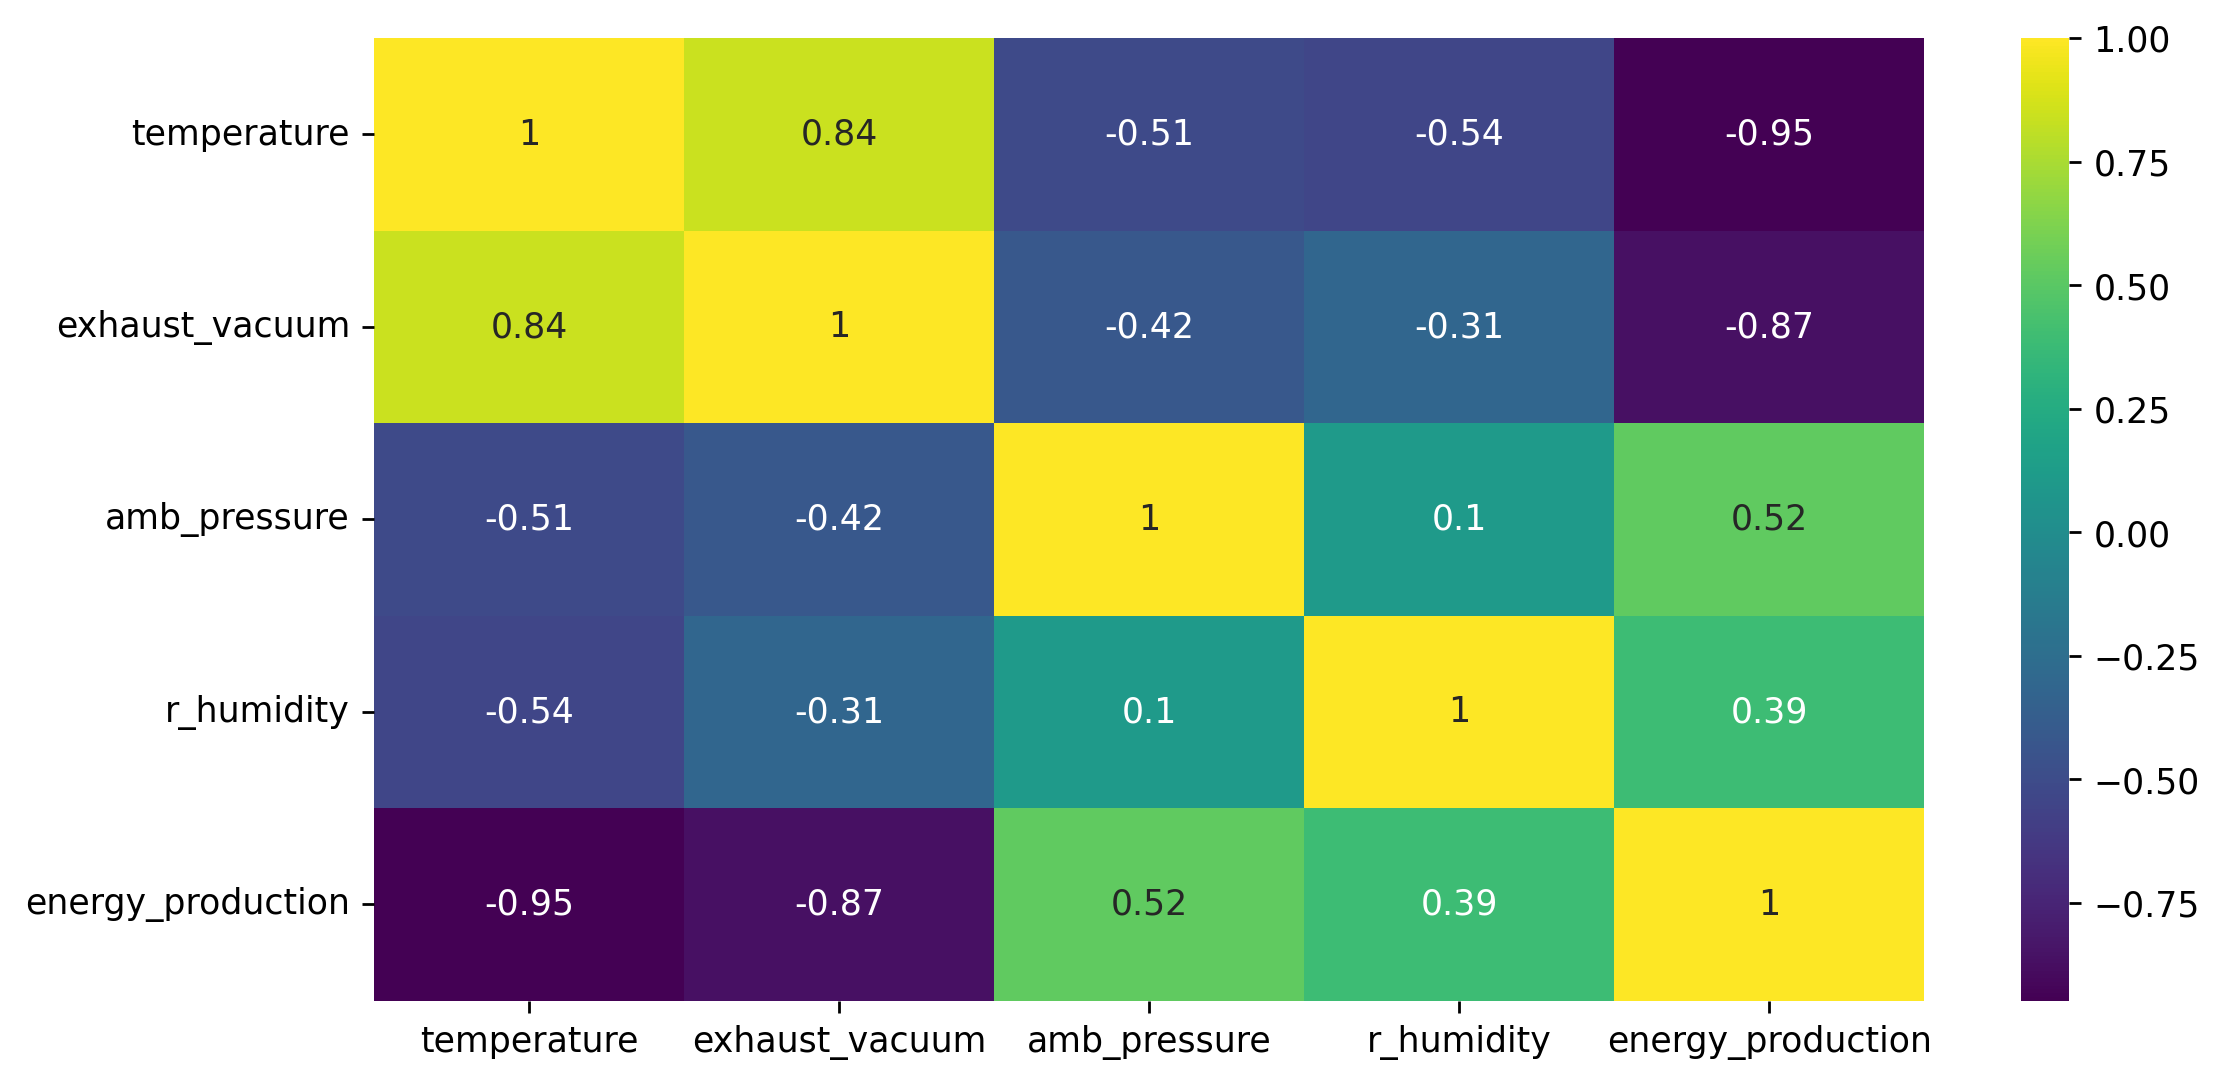

In [32]:
sns.heatmap(df.corr(), annot=True, cmap ="viridis")

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

# For this data set, we don't need to alter any columns because each column solely contains numerical values

## After completed all the EDA Section the final part we need to save the files for creating the model building

In [33]:
df.to_csv(r'C:\Users\vimal\OneDrive\Desktop\Regression_model\notebook\data\final_eda_output.csv', index=False)
